In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

df = pd.read_excel('MINT-Woche 2023 (SuS).xlsx')

cols_to_drop = ['ID', 'Startzeit', 'Fertigstellungszeit', 'E-Mail']

# read dictionary with alternativ names for modules
with open('modules.pkl', 'rb') as f:
    modules = pickle.load(f)

modules_short = {k: v[0] for k, v in modules.items()}
modules_code = {k: v[1] for k, v in modules.items()}

# read dictionary with short column names
with open('short_names.pkl', 'rb') as f:
    short_names = pickle.load(f)

def prepare_df (df_):
    return (df_
        .drop(cols_to_drop, axis=1)
        .rename(columns=short_names)
        .assign(score = lambda x: x.score+1)
        .assign(company_score = lambda x: x.company_score+1)
        .assign(uni1_score = lambda x: x.uni1_score+1)
        .assign(uni2_score = lambda x: x.uni2_score+1)
        .assign(uni3_score = lambda x: x.uni3_score+1)
        .assign(workshop_score = lambda x: x.workshop_score+1)
        .assign(gender_score = lambda x: x.gender_score+1)
        .assign(company_short = lambda x: x.company.map(modules_short))
        .assign(company_code = lambda x: x.company.map(modules_code))
        .assign(uni1_short = lambda x: x.uni1.map(modules_short))
        .assign(uni1_code = lambda x: x.uni1.map(modules_code))
        .assign(uni2_short = lambda x: x.uni2.map(modules_short))
        .assign(uni2_code = lambda x: x.uni2.map(modules_code))
        .assign(uni3_short = lambda x: x.uni3.map(modules_short))
        .assign(uni3_code = lambda x: x.uni3.map(modules_code))
        .assign(workshop_short = lambda x: x.workshop.map(modules_short))
        .assign(workshop_code = lambda x: x.workshop.map(modules_code))
    )

df = prepare_df(df)
df

,Name,score,best_of_week,missed_in_week,descriptions_helpful,inscription_easy,allocation_fair,info_clear,forensics_interesting,forensics_clear,...,company_short,company_code,uni1_short,uni1_code,uni2_short,uni2_code,uni3_short,uni3_code,workshop_short,workshop_code
0,Ryan Meier,4,Hochschultag,mehr Firmenbesuche/ Hochschultage,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft eher zu,trifft eher zu,...,True Wealth,F10,Drohnen,HS1.5,DHEST,HS2.3,DMAVT,HS3.6,Astrophysik,W4
1,Mattia Theus,5,Studienbesuche,Mehr einblicke,trifft eher zu,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft eher zu,trifft vollständig zu,...,Siemens,F4,DBAUG Raum,HS1.3,DPHYS,HS2.5,DMAVT,HS3.6,Astrophysik,W4
2,Anatoli Voronenko,5,Firmenbesuche,Spannenderen Freitag,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft eher zu,trifft vollständig zu,trifft vollständig zu,...,MAN,F6,DBAUG Raum,HS1.3,DPHYS,HS2.5,DMAVT,HS3.6,Astrophysik,W4
3,Vincent Guérin,4,Uni tag und Siemens,Meine tolle lehrerinnen und lehrer,trifft eher zu,trifft eher zu,trifft eher zu,trifft eher zu,trifft eher nicht zu,trifft eher zu,...,Siemens,F4,Drohnen,HS1.5,DCHAB Chemie,HS2.1,DINFK,HS3.4,Datenexploration,W3
4,Alexander Frei,5,Hochschultag,ETH,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft eher zu,...,True Wealth,F10,DBAUG Raum,HS1.3,DCHAB Pharma,HS2.4,DITET,HS3.5,Big Data,W9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Alexandros Mitsiadis Echanove,5,Firma,nichts,trifft eher zu,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft eher zu,trifft vollständig zu,...,True Wealth,F10,Drohnen,HS1.5,DCHAB Pharma,HS2.4,DMAVT,HS3.6,Astrophysik,W4
143,Felix Kälin,5,"Die Besuche an Hochschulen und Unis, die Abwec...",-,trifft eher zu,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft eher zu,trifft vollständig zu,...,Weidmann,F9,DARCH,HS1.1,Informatik UZH,HS2.7,DINFK,HS3.4,DNA,W10
144,Marc Schildknecht,6,Die Führung der Physikstudenten am Hönggerberg...,Ein weiterer Hochschultag wäre meiner Meinung ...,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft eher nicht zu,kann ich nicht beurteilen,kann ich nicht beurteilen,...,NaN,NaN,DBAUG Raum,HS1.3,DPHYS,HS2.5,DMATH,HS3.7,SYPT,W8
145,Victoria Hoffmann,5,Dienstag (um Studienrichtungen auszuprobieren),mehr Zeit um Studienrichtungen auszuprobieren,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft vollständig zu,trifft eher nicht zu,trifft eher zu,...,Hocoma,F13,Drohnen,HS1.5,DHEST,HS2.3,DMAVT,HS3.6,DNA,W10


In [2]:
# function to plot histograms
def plot_hist(df, column, bins, suptitle, title, color):
    fig = plt.figure(figsize=(3, 3), dpi=150)
    df.hist(column=column, bins=bins, rwidth=0.8, color=color, ax=plt.gca())
    plt.suptitle(suptitle, y=1.05)
    plt.title(title)
    plt.xticks(range(1,7))
    plt.grid(False)
    plt.show()
    plt.close()

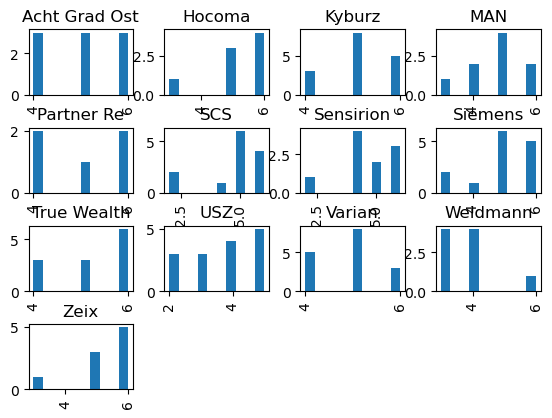

In [3]:
company_grp = df.groupby('company_short')

(company_grp
    .company_score.mean()
)

hist=df.company_score.hist(by=df.company_short)
# for group_name, group in grouped:
#     mean = group['company_score'].mean()
#     std = group['company_score'].std()
#     count = group['company_score'].count()

#     suptitle = f'{group_name}'
#     title = f'N = {count}, {mean:.1f} ± {std:.1f}'

#     plot_hist(group, 'company_score', np.arange(2.5, 7), suptitle, title, 'black')


In [41]:
hist.iloc[1]

<AxesSubplot:>

In [ ]:
types = ['company', 'uni1', 'uni2', 'uni3', 'workshop']
types_short = [type+'_short' for type in types]
types_score = [type+'_score' for type in types]

for short, score in zip(types_short, types_score):
    groups = df.groupby([short])
    for g in :
        print(groups.get_group(g)[[short, score]])


     company_short  company_score
6    Acht Grad Ost            4.0
69   Acht Grad Ost            5.0
74   Acht Grad Ost            6.0
94   Acht Grad Ost            6.0
100  Acht Grad Ost            5.0
101  Acht Grad Ost            4.0
120  Acht Grad Ost            5.0
127  Acht Grad Ost            6.0
128  Acht Grad Ost            4.0
    company_short  company_score
34         Hocoma            6.0
40         Hocoma            3.0
64         Hocoma            5.0
72         Hocoma            5.0
76         Hocoma            6.0
92         Hocoma            6.0
99         Hocoma            6.0
145        Hocoma            5.0
    company_short  company_score
14         Kyburz            6.0
24         Kyburz            4.0
37         Kyburz            4.0
59         Kyburz            5.0
73         Kyburz            5.0
77         Kyburz            5.0
78         Kyburz            5.0
83         Kyburz            6.0
84         Kyburz            6.0
89         Kyburz            5.0


In [ ]:
df.groupby('company_short').groups

{'Acht Grad Ost': [6, 69, 74, 94, 100, 101, 120, 127, 128], 'Hocoma': [34, 40, 64, 72, 76, 92, 99, 145], 'Kyburz': [14, 24, 37, 59, 73, 77, 78, 83, 84, 89, 93, 96, 106, 108, 111, 139], 'MAN': [2, 7, 10, 46, 53, 58, 71, 134, 146], 'Partner Re': [29, 33, 61, 104, 110], 'SCS': [12, 13, 15, 18, 19, 20, 31, 103, 121, 125, 132, 133, 138], 'Sensirion': [22, 57, 66, 79, 105, 114, 115, 135, 136, 137], 'Siemens': [1, 3, 5, 25, 42, 50, 56, 60, 68, 86, 90, 118, 129, 140], 'True Wealth': [0, 4, 8, 23, 26, 30, 35, 51, 55, 117, 131, 142], 'USZ': [17, 32, 48, 54, 70, 81, 82, 85, 88, 95, 112, 113, 119, 122, 141], 'Varian': [9, 27, 36, 41, 43, 44, 62, 63, 67, 75, 87, 98, 102, 109, 123, 126], 'Weidmann': [11, 21, 38, 39, 65, 107, 116, 124, 143], 'Zeix': [16, 28, 45, 47, 49, 52, 80, 91, 97]}

In [ ]:
df_f = df[df['sex'] == 'weiblich']
df_m = df[df['sex'] == 'männlich']

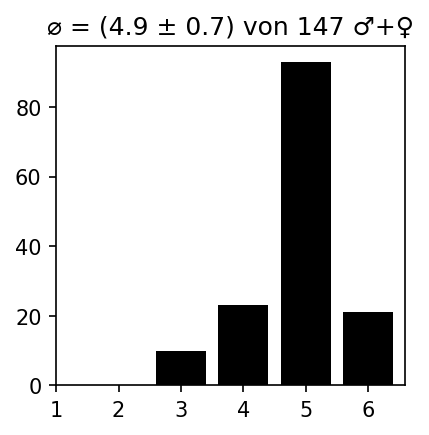

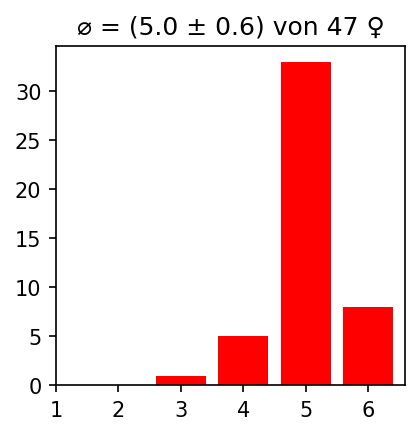

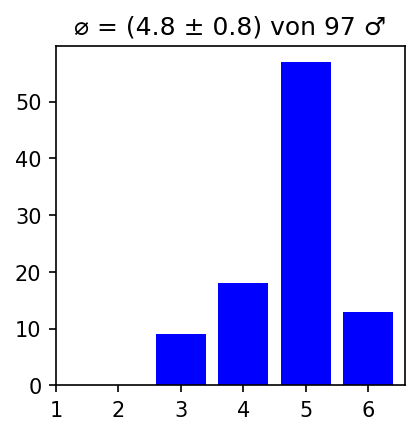

In [ ]:
female = '\u2640'
male = '\u2642'
mean = '\u2300'

path = 'general/'
score = 'score'

m_mean = df[score].mean()
m_std = df[score].std()
m_count = len(df.index)
m_mean_f = df_f[score].mean()
m_std_f = df_f[score].std()
m_count_f = len(df_f.index)
m_mean_m = df_m[score].mean()
m_std_m = df_m[score].std()
m_count_m = len(df_m.index)

title = f'{mean} = ({m_mean:.1f} ± {m_std:.1f}) von {m_count} {male}+{female}'
title_f = f'{mean} = ({m_mean_f:.1f} ± {m_std_f:.1f}) von {m_count_f} {female}'
title_m = f'{mean} = ({m_mean_m:.1f} ± {m_std_m:.1f}) von {m_count_m} {male}'

fig = plt.figure(figsize=(3, 3), dpi=150)
df.hist(column=score, bins=np.arange(2.5, 7, 1), rwidth=0.8, color='black', ax = plt.gca())
plt.title(title)
plt.xticks(range(1,7))
plt.grid(False)
plt.savefig(path+'score.png')

fig = plt.figure(figsize=(3, 3), dpi=150)
df_f.hist(column=score, bins=np.arange(2.5, 7, 1), rwidth=0.8, color='red', ax = plt.gca())
plt.title(title_f)
plt.xticks(range(1,7))
plt.grid(False)
plt.savefig(path+'score_f.png')

fig = plt.figure(figsize=(3, 3), dpi=150)
df_m.hist(column=score, bins=np.arange(2.5, 7, 1), rwidth=0.8, color='blue', ax = plt.gca())
plt.title(title_m)
plt.xticks(range(1,7))
plt.grid(False)
plt.savefig(path+'score_m.png')

In [ ]:
type = 'company'

# function to plot histograms
def plot_hist(df, column, bins, title, color):
    fig = plt.figure(figsize=(3, 3), dpi=150)
    df.hist(column=column, bins=bins, rwidth=0.8, color=color, ax = plt.gca())
    plt.title(title)
    plt.xticks(range(1,7))
    plt.grid(False)
    plt.show()


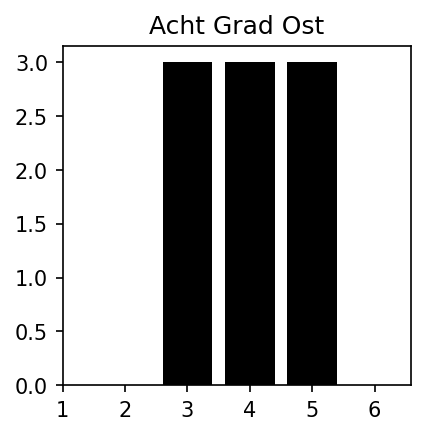

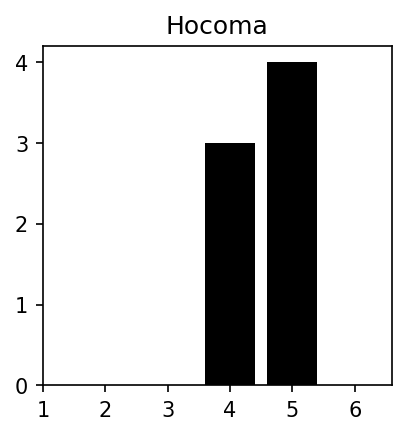

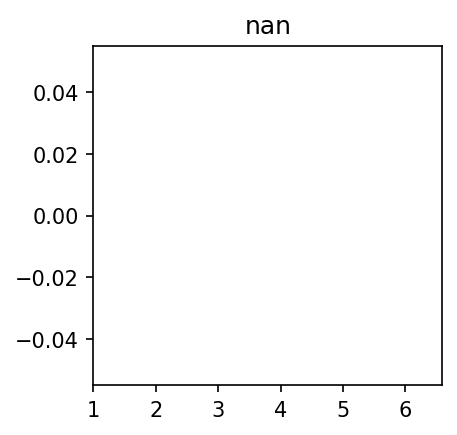

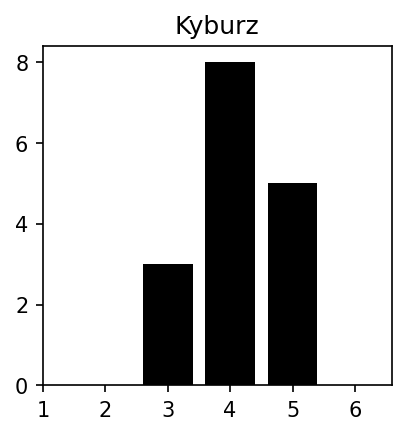

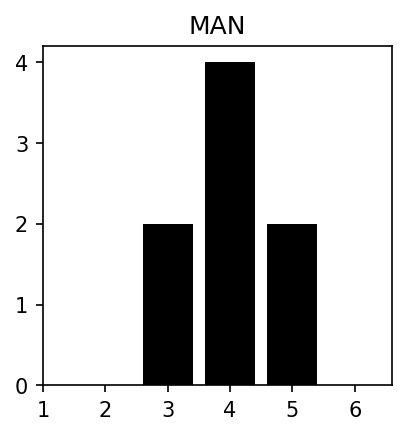

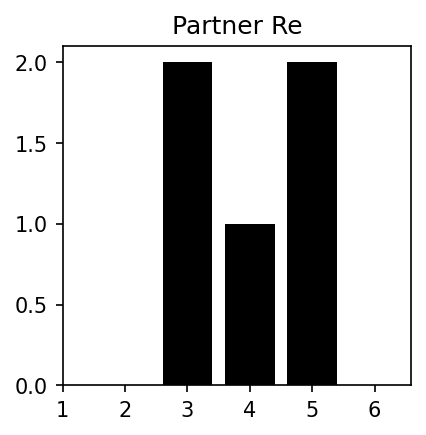

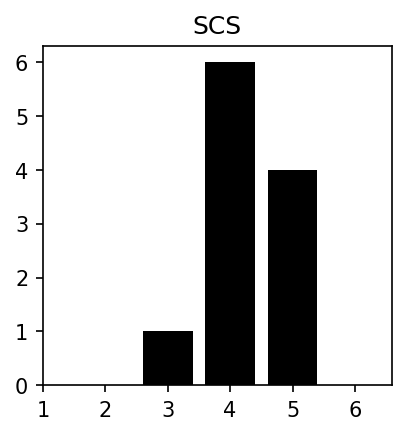

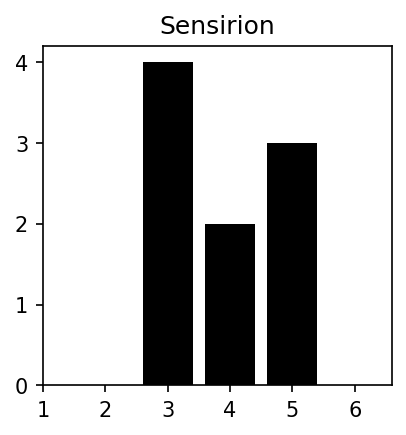

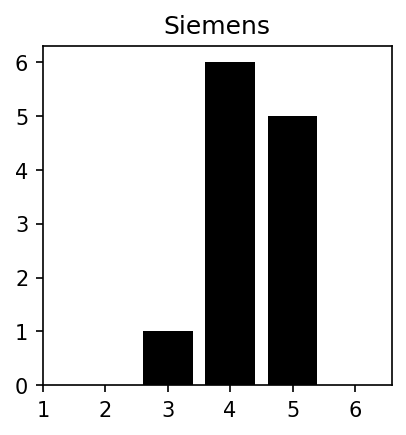

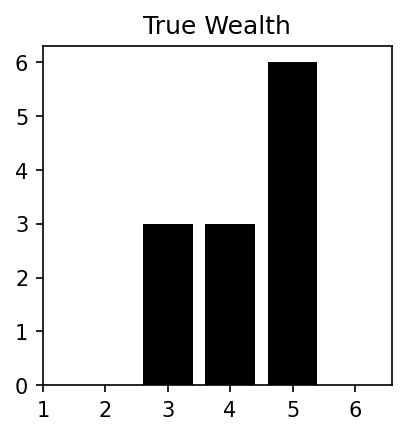

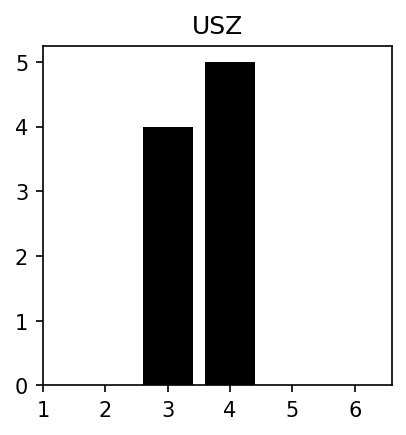

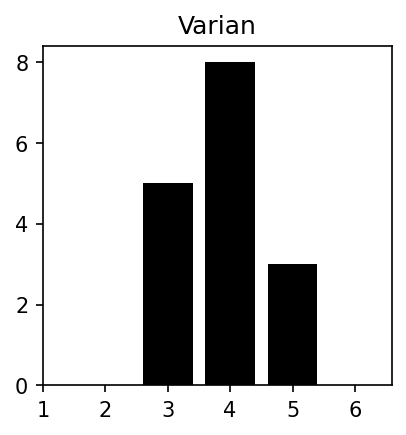

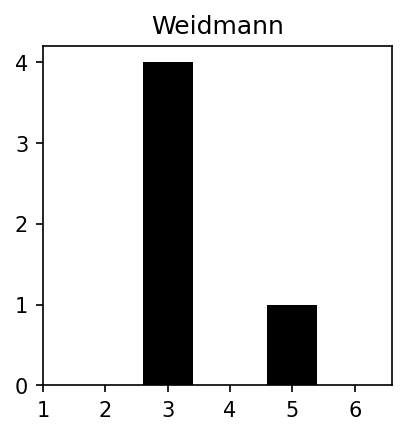

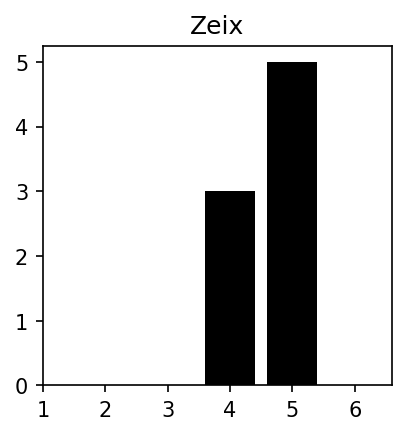

In [ ]:
for index, module in df.groupby(type):
    type_short = type+'_short'
    title = f'{module[type_short].iloc[0]}'
    plot_hist(module, type+'_score', np.arange(2.5, 7, 1), title, 'black')